# Downloading and Extracting the Cornell Movie-Dialogs Corpus
This code downloads a dataset from Kaggle and copies it to the current working directory for easier access.

#### Key Steps:
1. **KaggleHub Download**:
   - Uses `kagglehub.dataset_download()` to fetch the `"rajathmc/cornell-moviedialog-corpus"` dataset.
   - The downloaded dataset's path is stored in `path` and printed for verification.

2. **Local Directory Setup**:
   - Imports `shutil` and `os` to handle file operations.
   - Sets `source_path` to the downloaded dataset location.
   - Defines `destination_path` as the current working directory (via `os.getcwd()`).

3. **Copying Files**:
   - Uses `shutil.copytree()` to recursively copy the dataset to a new folder named `"cornell-moviedialog-corpus"` in the current directory.
   - Prints the destination path for confirmation.

#### Notes:
- **Prerequisites**:
  - Requires the `kagglehub` package installed (`pip install kagglehub`).
  - Ensure Kaggle credentials are configured if the dataset is private.
- **Output**:
  - The dataset files will be available in `./cornell-moviedialog-corpus/`.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajathmc/cornell-moviedialog-corpus")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cornell-moviedialog-corpus


In [2]:
import shutil
import os

# Source path (where the dataset was downloaded)
source_path = path

# Destination path (current working directory)
destination_path = os.getcwd()  # Gets the current working directory

# Copy all contents from source to destination
shutil.copytree(source_path, os.path.join(destination_path, "cornell-moviedialog-corpus"))

print(f"Dataset copied to: {os.path.join(destination_path, 'cornell-moviedialog-corpus')}")

Dataset copied to: /content/cornell-moviedialog-corpus


## Processing the Cornell Movie-Dialogs Corpus
Following code processes the movie conversations and lines from the Cornell Movie-Dialogs Corpus to extract question-answer (QA) pairs for dialogue modeling.

#### Key Steps:

1. **File Paths and Initialization**:
   - `corpus_movie_conv`: Path to the conversations file (`movie_conversations.txt`).
   - `corpus_movie_lines`: Path to the dialogue lines file (`movie_lines.txt`).
   - `max_len`: Maximum allowed length of a sentence (25 words).

2. **Reading Data**:
   - Conversations (`conv`) and dialogue lines (`lines`) are loaded into memory.
   - The lines file uses `latin-1` encoding to handle special characters.

3. **Building a Lines Dictionary**:
   - `lines_dict` maps each line ID (e.g., `L194`) to its corresponding text by splitting on `" +++$+++ "`.
   - Example: `lines_dict["L194"]` → "First dialogue line text..."

4. **Text Preprocessing**:
   - `remove_punc()` removes punctuation and converts text to lowercase for uniformity.
   - Example: `"Hello, World!"` → `"hello world"`.

5. **Extracting QA Pairs**:
   - For each conversation in `conv`, the line IDs are extracted (e.g., `['L194', 'L195', ...]`).
   - Adjacent lines are paired as questions and answers:
     - `first`: The current line (preprocessed).
     - `second`: The next line (preprocessed).
   - Each pair is truncated to `max_len` words and added to `pairs`.

6. **Output**:
   - The total number of QA pairs (`221616`) is printed, showing the scale of the dataset.

#### Example QA Pair:
# Input:
["hello how are you", "i am fine thanks"]

# Preprocessed (max_len=3):
[["hello", "how", "are"], ["i", "am", "fine"]]

In [3]:
# Paths to the movie conversation and lines files
corpus_movie_conv = "cornell-moviedialog-corpus/movie_conversations.txt"
corpus_movie_lines = "cornell-moviedialog-corpus/movie_lines.txt"

# Maximum length for sequences
max_len = 25

# Read conversation data
with open(corpus_movie_conv, "r") as c:
    conv = c.readlines()

# Read movie lines with Latin-1 encoding
with open(corpus_movie_lines, "r", encoding='latin-1') as l:
    lines = l.readlines()

In [4]:
lines[:10]

['L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!\n',
 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!\n',
 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.\n',
 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?\n',
 "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.\n",
 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow\n',
 "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.\n",
 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No\n',
 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?\n',
 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?\n']

In [5]:
lines_dict = {}
for line in lines:
  objects = line.split(" +++$+++ ")
  lines_dict[objects[0]] = objects[-1]

In [6]:
def remove_punc(string):
    # Define punctuation characters to remove
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punc = ""

    # Iterate through each character and remove punctuation
    for char in string:
        if char not in punctuations:
            no_punc += char

    # Return the cleaned string in lowercase
    return no_punc.lower()

In [7]:
eval(conv[0].split(" +++$+++ ")[-1])

['L194', 'L195', 'L196', 'L197']

In [8]:
# Initialize an empty list to store conversation pairs
pairs = []

# Iterate through each conversation in the conversation data
for con in conv:
    # Extract the list of line IDs involved in the conversation
    ids = eval(con.split(" +++$+++ ")[-1])

    # Iterate through each line ID to form question-answer pairs
    for i in range(len(ids)):
        qa_pairs = []

        # Skip the last line as it doesn't have a subsequent line to pair with
        if i == len(ids) - 1:
            break

        # Get and clean the current line and the next line
        first = remove_punc(lines_dict[ids[i]].strip())
        second = remove_punc(lines_dict[ids[i + 1]].strip())

        # Split the lines into words and limit to max_len words
        qa_pairs.append(first.split()[:max_len])
        qa_pairs.append(second.split()[:max_len])

        # Add the question-answer pair to the pairs list
        pairs.append(qa_pairs)

In [9]:
len(pairs)

221616

### Building Vocabulary from Dialogue Pairs
Following code creates a vocabulary mapping for the dialogue pairs by analyzing word frequencies and assigning special tokens.

#### Key Steps:

1. **Word Frequency Counting**:
   - Uses `Counter` from `collections` to count occurrences of each word across all question-answer pairs.
   - Iterates through `pairs`, updating counts for words in both questions (`pair[0]`) and answers (`pair[1]`).

2. **Vocabulary Filtering**:
   - Keeps only words that appear more than `min_word_freq` (5) times to filter out rare words.
   - This helps reduce vocabulary size and eliminates noise from infrequent words.

3. **Word-to-Index Mapping**:
   - Creates `word_map` dictionary where each word is assigned a unique integer:
     - Frequent words are numbered sequentially starting from 1
     - Adds four special tokens:
       - `<pad>` → 0 (for padding shorter sequences)
       - `<unk>` → for unknown/rare words
       - `<start>` → to mark beginning of sequences
       - `<end>` → to mark end of sequences

4. **Vocabulary Persistence**:
   - Saves the `word_map` dictionary as a JSON file (`WORDMAP_corpus.json`) for later use in model training.

#### Example Output:
{
  "`<pad>`": 0,
  "hello": 1,
  "how": 2,
  ...
  "`<unk>`": 2532,
  "`<start>`": 2533,
  "`<end>`": 2534
}

In [10]:
from collections import Counter

word_freq = Counter()
for pair in pairs:
  word_freq.update(pair[0])
  word_freq.update(pair[1])

word_freq

Counter({'can': 14103,
         'we': 25912,
         'make': 5821,
         'this': 30502,
         'quick': 310,
         'roxanne': 1,
         'korrine': 1,
         'and': 52131,
         'andrew': 49,
         'barrett': 20,
         'are': 21713,
         'having': 1081,
         'an': 8827,
         'incredibly': 49,
         'horrendous': 4,
         'public': 306,
         'break': 799,
         'up': 14316,
         'on': 23908,
         'the': 120903,
         'quad': 2,
         'again': 2807,
         'well': 16263,
         'i': 137639,
         'thought': 4202,
         'wed': 541,
         'start': 1459,
         'with': 21394,
         'pronunciation': 2,
         'if': 16727,
         'thats': 14742,
         'okay': 5946,
         'you': 169695,
         'not': 26496,
         'hacking': 18,
         'gagging': 9,
         'spitting': 15,
         'part': 1260,
         'please': 3258,
         'then': 7532,
         'how': 14001,
         'bout': 393,
         'try

In [11]:
# Minimum word frequency threshold
min_word_freq = 5

# Filter words that meet the minimum frequency requirement
words = [w for w in word_freq.keys() if word_freq[w] > min_word_freq]

# Create word-to-index mapping, starting from 1
word_map = {k: v + 1 for v, k in enumerate(words)}

# Add special tokens to the word map
word_map['<unk>'] = len(word_map) + 1  # Unknown words
word_map['<start>'] = len(word_map) + 1  # Start token
word_map['<end>'] = len(word_map) + 1  # End token
word_map['<pad>'] = 0  # Padding token (assigned index 0)

In [12]:
# Save word map to JSON file
import json
with open("WORDMAP_corpus.json", "w") as j:
    json.dump(word_map, j)

### Encoding Text Sequences for Model Training
Following code converts the preprocessed text pairs into numerical sequences suitable for neural network training, while handling special tokens and padding.

#### Encoding Functions:

1. **`encode_question(question_words, word_map)`**:
   - Converts a question into numerical indices
   - **Process**:
     - Each word is looked up in `word_map` (uses `<unk>` for missing words)
     - Padding (`<pad> = 0`) is added to reach `max_len`
   - **Example**: `["how", "are", "you"]` → `[12, 25, 63, 0, 0, ...]` (for `max_len=25`)

2. **`encode_reply(answer_words, word_map)`**:
   - Converts an answer with special sequence tokens
   - **Process**:
     - Starts with `<start>` token
     - Includes word indices (with `<unk>` for unknowns)
     - Ends with `<end>` token
     - Adds padding to reach `max_len`
   - **Example**: `["i", "am", "fine"]` → `[2533, 8, 42, 156, 2534, 0, 0, ...]`

#### Special Token Handling:
| Token    | Purpose                          | Example ID |
|----------|----------------------------------|------------|
| `<pad>`  | Padding for fixed-length sequences | 0         |
| `<unk>`  | Unknown/low-frequency words      | 2532      |
| `<start>`| Start-of-sequence marker         | 2533      |
| `<end>`  | End-of-sequence marker           | 2534      |

#### Full Encoding Process:
1. Iterates through all QA pairs
2. Encodes questions using `encode_question()`
3. Encodes answers using `encode_reply()`
4. Stores encoded pairs in `pairs_encoded`

#### Why This Matters:
- Converts variable-length text to fixed-length numerical arrays
- Special tokens help the model learn:
  - When sequences start/end (`<start>`, `<end>`)
  - How to handle padding in batches (`<pad>`)
  - How to deal with unknown vocabulary (`<unk>`)



In [13]:
# Encode question by converting words to indices and padding to max_len
def encode_question(words, word_map):
    enc_c = [word_map.get(word, word_map["<unk>"]) for word in words] + [word_map["<pad>"]] * (max_len - len(words))
    return enc_c

# Encode reply with start/end tokens and padding to max_len
def encode_reply(words, word_map):
    enc_c = [word_map["<start>"]] + [word_map.get(word, word_map["<unk>"]) for word in words] + [word_map["<end>"]] + [word_map["<pad>"]] * (max_len - len(words))
    return enc_c

In [14]:
print(" ".join(pairs[0][0]))
encode_reply(pairs[0][1], word_map)

can we make this quick roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad again


[18241,
 19,
 20,
 21,
 22,
 23,
 24,
 18240,
 25,
 26,
 27,
 24,
 28,
 18242,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
# Initialize list to store encoded question-answer pairs
pairs_encoded = []

# Iterate through each question-answer pair
for pair in pairs:
    # Encode the question part
    ques = encode_question(pair[0], word_map)
    # Encode the answer part
    ans = encode_reply(pair[1], word_map)
    # Add encoded pair to the list
    pairs_encoded.append([ques, ans])

In [16]:
# Save pairs encoded to JSON file
import json
with open("pairs_encoded.json", "w") as w:
  json.dump(pairs_encoded, w)

### PyTorch Data Pipeline for Dialogue Pairs
This code creates a custom PyTorch Dataset and DataLoader to efficiently handle batches of encoded question-answer pairs for model training.

#### Key Components:

1. **Custom Dataset Class**:
   - Inherits from `torch.utils.data.Dataset`
   - **`__init__`**:
     - Loads pre-encoded pairs from JSON file (`pairs_encoded.json`)
     - Stores dataset size
   - **`__getitem__`**:
     - Converts encoded sequences to `LongTensor`
     - Returns (question, reply) tuple for a given index
   - **`__len__`**:
     - Returns total number of pairs

2. **DataLoader Setup**:
   - Creates `train_loader` with:
     - Batch size of 100 samples
     - Shuffling enabled (`shuffle=True`)
     - Pinned memory for faster GPU transfer (`pin_memory=True`)

3. **Output Shapes**:
   - **Questions**: `[100, 25]` (batch_size × max_question_length)
   - **Replies**: `[100, 27]` (batch_size × max_reply_length + 2 for <start>/<end> tokens)

#### Why This Matters:
- **Efficient Training**:
  - Batched processing speeds up training
  - Automatic shuffling improves model generalization
- **GPU Optimization**:
  - `pin_memory=True` enables faster CPU-to-GPU transfers


In [17]:
# Import required modules
from torch.utils.data import Dataset
import torch
import json

# Custom Dataset class
class Dataset(Dataset):
    def __init__(self, path):
        # Load encoded pairs from JSON file
        self.pairs = json.load(open(path))
        # Store dataset size
        self.dataset_size = len(self.pairs)

    def __getitem__(self, index):
        # Convert question and reply to LongTensors
        question = torch.LongTensor(self.pairs[index][0])
        reply = torch.LongTensor(self.pairs[index][1])
        return question, reply

    def __len__(self):
        # Return total number of pairs
        return self.dataset_size

# Create dataset instance
dataset = Dataset(path="pairs_encoded.json")

In [18]:
# Import DataLoader from PyTorch
from torch.utils.data import DataLoader

# Create DataLoader for training
train_loader = DataLoader(dataset, batch_size=100, shuffle=True, pin_memory=True)

# Get a batch of data and check shapes
question, reply = next(iter(train_loader))
question.shape, reply.shape

(torch.Size([100, 25]), torch.Size([100, 27]))

In [19]:
reply[0]

tensor([18241,    87,  1063,    20,   267, 18242,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0])

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **Create Transformer Masks**  
Generates attention masks for the transformer:  
1. **`src_key_padding_mask`**: Mask for encoder input padding (`True` at pad positions).  
2. **`tgt_key_padding_mask`**: Mask for decoder input padding.  
3. **`tgt_mask`**: Causal mask for decoder self-attention (upper-triangular `-inf`).  

**Args**:  
- `src`: Encoder input tensor `[batch_size, src_len]`.  
- `tgt_input`: Decoder input tensor `[batch_size, tgt_len]`.  
- `pad_token`: Padding token ID (default: `0`).  

**Returns**:  
Tuple of masks for encoder/decoder attention.  

In [21]:
def create_transformer_masks(src, tgt_input, pad_token=0):
    # Create source key padding mask:
    # Marks positions where `src` tokens are padding (True for padding, False otherwise)
    # Shape: [batch_size, src_len]
    src_key_padding_mask = (src == pad_token)  # bool, True at PAD positions

    # Create target key padding mask:
    # Marks positions where `tgt_input` tokens are padding (True for padding, False otherwise)
    # Shape: [batch_size, tgt_len]
    tgt_key_padding_mask = (tgt_input == pad_token)  # bool, True at PAD positions

    # Create target causal mask (prevents decoder from attending to future tokens):
    # Upper triangular matrix with -inf (for masked positions) and 0 (for allowed positions)
    # Shape: [tgt_len, tgt_len]
    tgt_len = tgt_input.size(1)  # Get target sequence length
    tgt_mask = torch.triu(torch.ones((tgt_len, tgt_len), device=src.device), diagonal=1) == 1  # Upper triangle (diagonal=1 excludes main diagonal)
    tgt_mask = tgt_mask.float().masked_fill(tgt_mask == 1, float('-inf')).masked_fill(tgt_mask == 0, float(0.0))  # Replace 1s with -inf, 0s remain 0

    return src_key_padding_mask, tgt_key_padding_mask, tgt_mask

### **Embeddings Layer**  
Combines token embeddings with positional encodings for transformer inputs.  

#### **Key Components**:  
1. **Token Embeddings**: `nn.Embedding` layer to map vocabulary indices to `d_model`-dimensional vectors.  
2. **Positional Encodings**: Sinusoidal patterns to inject positional information (Vaswani et al., 2017).  
3. **Dropout**: Regularization via `nn.Dropout`.  

#### **Methods**:  
- **`create_positional_encoding(max_len, d_model)`**:  
  Generates sinusoidal positional encodings of shape `[max_len, d_model]` using geometric progression of wavelengths.  
- **`forward(encoded_words)`**:  
  Scales token embeddings by `√d_model`, adds positional encodings, and applies dropout.  

#### **Args**:  
- `vocab_size`: Size of the vocabulary.  
- `d_model`: Embedding dimension.  
- `dropout`: Dropout probability.  
- `max_len`: Maximum sequence length for positional encodings (default: `50`).  

#### **Input**:  
- `encoded_words`: Token indices tensor `[batch_size, seq_len]`.  

#### **Output**:  
- Embeddings tensor `[batch_size, seq_len, d_model]`.  

In [31]:
from torch import nn
import math

class Embeddings(nn.Module):
    def __init__(self, vocab_size, d_model, dropout, max_len=50):
        super().__init__()
        self.d_model = d_model  # Dimension of the embedding vectors
        self.dropout = nn.Dropout(dropout)  # Dropout layer for regularization
        self.embed = nn.Embedding(vocab_size, d_model)  # Token embedding layer
        self.pe = self.create_positional_encoding(max_len, d_model)  # Pre-computed positional encoding

    def create_positional_encoding(self, max_len, d_model):
        # Initialize a matrix to hold positional encodings (max_len x d_model)
        pe = torch.zeros(max_len, d_model).to(device)

        # Generate positional encodings using sine and cosine functions
        for pos in range(max_len):  # For each position in the sequence
            for i in range(0, d_model, 2):  # For each even/odd pair in the embedding dimension
                # Sine for even indices, cosine for odd indices
                pe[pos, i] = math.sin(pos / (10000 ** ((2 * i) / d_model)))
                pe[pos, i + 1] = math.cos(pos / (10000 ** ((2 * (i + 1)) / d_model)))

        # Add batch dimension: [1, max_len, d_model] for broadcasting
        pe = pe.unsqueeze(0)
        return pe

    def forward(self, encoded_words):
        # Convert token indices to embeddings and scale by sqrt(d_model)
        embeddings = self.embed(encoded_words) * math.sqrt(self.d_model)

        # Add positional encodings (truncate to match input sequence length)
        embeddings += self.pe[:, :embeddings.size(1)]

        # Apply dropout for regularization
        embeddings = self.dropout(embeddings)
        return embeddings

### **Transformer Model**  
End-to-end transformer architecture for sequence-to-sequence tasks (e.g., translation, text generation).  

#### **Components**:  
1. **Embedding Layer**:  
   - Converts token indices to embeddings with positional encodings (`Embeddings` class).  
2. **Transformer Layers**:  
   - Stacked encoder/decoder layers with multi-head attention (PyTorch `nn.Transformer`).  
   - Supports masking for padding (`key_padding_mask`) and causal attention (`tgt_mask`).  
3. **Output Projection**:  
   - Linear layer + log-softmax to predict token probabilities.  

#### **Key Args (__init__)**:  
- `vocab_size`: Size of vocabulary.  
- `d_model`: Embedding dimension (default: `512`).  
- `nhead`: Number of attention heads (default: `8`).  
- `num_layers`: Encoder/decoder layers (default: `3`).  
- `dim_feedforward`: FFN hidden dimension (default: `2048`).  
- `dropout`: Dropout probability (default: `0.1`).  

#### **Forward Pass**:  
- **Inputs**:  
  - `src`: Encoder input tokens `[batch_size, src_len]`.  
  - `tgt`: Decoder input tokens `[batch_size, tgt_len]`.  
  - `src_key_padding_mask`: Mask for encoder padding `[batch_size, src_len]`.  
  - `tgt_key_padding_mask`: Mask for decoder padding `[batch_size, tgt_len]`.  
  - `tgt_mask`: Causal mask for decoder `[tgt_len, tgt_len]`.  
- **Output**:  
  - Log probabilities over vocabulary `[batch_size, tgt_len, vocab_size]`.  

#### **Note**:  
- Uses `batch_first=True` for consistent tensor shapes with embeddings.  
- Log-softmax stabilizes training vs. raw logits.  

In [32]:
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, d_model=512, nhead=8, num_layers=3, dim_feedforward=2048, dropout=0.1):
        super().__init__()
        # Embedding layer: converts token indices to embeddings + positional encoding
        self.embedding = Embeddings(vocab_size, d_model, dropout)

        # Core Transformer module (encoder + decoder)
        self.transformer = nn.Transformer(
            d_model=d_model,            # Embedding dimension
            nhead=nhead,               # Number of attention heads
            num_encoder_layers=num_layers,  # Number of encoder layers
            num_decoder_layers=num_layers,  # Number of decoder layers
            dim_feedforward=dim_feedforward,  # Hidden layer size in feedforward networks
            dropout=dropout,           # Dropout probability
            batch_first=True           # Input shape: (batch, seq_len, d_model)
        )

        # Final linear layer: projects transformer output back to vocabulary space
        self.fc_out = nn.Linear(d_model, vocab_size)

    def forward(self, src, tgt, src_key_padding_mask, tgt_key_padding_mask, tgt_mask):
        # Convert input tokens to embeddings (add positional encoding)
        src_emb = self.embedding(src)  # Shape: [batch_size, src_len, d_model]
        tgt_emb = self.embedding(tgt)  # Shape: [batch_size, tgt_len, d_model]

        # Pass through Transformer (encoder-decoder architecture)
        output = self.transformer(
            src_emb,  # Encoder input (source sequence embeddings)
            tgt_emb,  # Decoder input (target sequence embeddings)
            src_key_padding_mask=src_key_padding_mask,  # Mask for encoder padding tokens
            tgt_key_padding_mask=tgt_key_padding_mask,  # Mask for decoder padding tokens
            memory_key_padding_mask=src_key_padding_mask,  # Mask for encoder output (memory) padding
            tgt_mask=tgt_mask  # Causal mask for autoregressive decoding
        )  # Output shape: [batch_size, tgt_len, d_model]

        # Project to vocabulary space and apply log-softmax (for NLLLoss)
        return torch.log_softmax(self.fc_out(output), dim=-1)  # Shape: [batch_size, tgt_len, vocab_size]

**Purpose**: Implements warmup learning rate schedule for Transformer training

**Key Features**:
- Linear warmup followed by inverse square root decay
- Learning rate formula:
  `lr = d_model^(-0.5) * min(step^(-0.5), step*warmup^(-1.5))`
- Automatically updates optimizer's LR each step

**Usage**:
1. Wraps any PyTorch optimizer
2. Call `step()` instead of optimizer.step()
3. Warmup typically ~4000-8000 steps

In [33]:
class AdamWarmUp:
  def __init__(self, model_size, warmup_size, optimizer):
    # Initialize learning rate scheduler parameters
    self.model_size   = model_size
    self.warmup_size  = warmup_size
    self.optimizer    = optimizer
    self.current_step = 0
    self.lr          = 0

  def get_lr(self):
    # Calculate learning rate with warmup
    return self.model_size ** (-0.5) * min(self.current_step ** (-0.5), self.current_step * self.warmup_size ** (-1.5))

  def step(self):
    # Update learning rate and optimizer step
    self.current_step += 1
    lr = self.get_lr()
    for param_group in self.optimizer.param_groups:
      param_group['lr'] = lr
    self.lr = lr
    self.optimizer.step()

**Purpose**: KLDivLoss with label smoothing regularization

**Key Features**:
- Distributes `smooth` probability mass over all classes
- Keeps `confidence` (1-smooth) for true class
- Masks padding positions (zero loss)
- Helps prevent overconfidence in predictions

**Parameters**:
- `size`: Vocabulary size
- `smooth`: Smoothing factor (e.g., 0.1)
- Processes batches of shape `(seq_len, vocab_size)`

In [34]:
class LossWithLS(nn.Module):
  def __init__(self, size, smooth):
    super().__init__()

    # Initialize loss components and smoothing parameters
    self.criterion  = nn.KLDivLoss(size_average=False, reduce=False)
    self.smooth     = smooth
    self.confidence = 1 - self.smooth
    self.size       = size

  def forward(self, prediction, target, mask):
    # Reshape tensors for loss calculation
    prediction = prediction.view(-1, prediction.size(-1))  # Flatten predictions
    target = target.contiguous().view(-1)  # Flatten targets
    mask = mask.float()  # Convert mask to float
    mask = mask.view(-1)  # Flatten mask

    # Apply label smoothing
    labels = prediction.data.clone()
    labels.fill_(self.smooth / (self.size - 1))  # Uniform distribution
    target = target.data.unsqueeze(1)
    labels.scatter_(1, target, self.confidence)  # Add confidence to true class

    # Calculate and mask the loss
    loss = self.criterion(prediction, labels)  # Compute KL divergence
    loss = (loss.sum(1) * mask).sum() / mask.sum()  # Apply mask and normalize
    return loss

In [42]:
d_model = 256
nhead = 8
num_layers = 3
dropout = 0.1

with open("WORDMAP_corpus.json", "r") as f:
    word_map = json.load(f)

model = TransformerModel(
    vocab_size=len(word_map),
    d_model=d_model,
    nhead=nhead,
    num_layers=num_layers,
    dropout=dropout
).to(device)

### **Training Loop**  
Implements the end-to-end training process for the transformer model with masked loss calculation.

#### **Key Features**:
1. **Teacher Forcing**: Uses decoder input (`reply_input`) shifted right by 1 token.
2. **Masked Loss**: Computes loss only on non-padding tokens (ignores padding with `mask`).
3. **Batch Processing**: Tracks and reports loss every 500 batches and per epoch.
4. **Model Checkpoints**: Saves model weights after each epoch.

#### **Parameters**:
- `train_loader`: DataLoader providing (question, reply) batches.
- `model`: Initialized transformer model.
- `optimizer`: Optimizer (e.g., Adam) with learning rate scheduling.
- `criterion`: Loss function (should handle masking).
- `epochs`: Number of training epochs.
- `device`: Target device (e.g., 'cuda').

#### **Training Steps**:
1. **Input Preparation**:
   - Shifts target sequence (`reply_input = reply[:, :-1]`).
   - Generates masks via `create_transformer_masks()`.
2. **Forward Pass**:
   - Computes log probabilities for next-token prediction.
3. **Loss Calculation**:
   - Flattens outputs/targets for batch processing.
   - Applies mask to ignore padding tokens (0) in loss.
4. **Optimization**:
   - Standard backpropagation with gradient clipping (if needed).
5. **Logging**:
   - Prints batch/epoch progress.
   - Saves model checkpoints (`transformer_{epoch}.pth`).

#### **Output**:
- `total_losses`: List of average losses per epoch for analysis.

#### **Example Usage**:


losses = train(train_loader, model, optimizer, criterion, epochs=10,
device='cuda')

plt.plot(losses)  # Visualize training progress

In [43]:
criterion = LossWithLS(size=len(word_map), smooth=0.1).to(device)
base_optimizer = torch.optim.Adam(model.parameters(), lr=0)
optimizer = AdamWarmUp(model_size=d_model, warmup_size=4000, optimizer=base_optimizer)

In [45]:
def train(train_loader, model, optimizer, criterion, epochs, device):
    model.train()  # Set model to training mode
    total_losses = []  # Store average loss per epoch

    for epoch in range(epochs):
        batch_losses = []  # Store loss per batch in current epoch

        for batch_number, (question, reply) in enumerate(train_loader, start=1):
            # Move data to GPU/CPU
            question, reply = question.to(device), reply.to(device)

            # Prepare decoder input (shifted right) and target (shifted left)
            reply_input = reply[:, :-1]  # Exclude last token (used as decoder input) [batch_size, tgt_len-1]
            reply_target = reply[:, 1:]  # Exclude first token (used as target) [batch_size, tgt_len-1]

            # Create masks for transformer (padding + causal masking)
            src_key_padding_mask, tgt_key_padding_mask, tgt_mask = create_transformer_masks(question, reply_input)

            # Forward pass: model computes log probabilities for next-token prediction
            outputs = model(
                question,  # Encoder input (source sequence)
                reply_input,  # Decoder input (target sequence shifted right)
                src_key_padding_mask=src_key_padding_mask,  # Mask for encoder padding
                tgt_key_padding_mask=tgt_key_padding_mask,  # Mask for decoder padding
                tgt_mask=tgt_mask  # Causal mask for autoregressive decoding
            )

            # Reshape outputs and targets for loss calculation
            outputs = outputs.view(-1, outputs.shape[-1])  # Flatten to [batch_size * (tgt_len-1), vocab_size]
            reply_target = reply_target.reshape(-1)  # Flatten to [batch_size * (tgt_len-1)]

            # Create loss mask (ignore padding tokens, i.e., where target == 0)
            mask = (reply_target != 0).float()  # 1 for non-padding, 0 for padding
            loss = criterion(outputs, reply_target, mask)  # Compute masked loss

            # Backpropagation
            optimizer.optimizer.zero_grad()  # Reset gradients
            loss.backward()  # Compute gradients
            optimizer.step()  # Update weights

            batch_losses.append(loss.item())  # Track batch loss

            # Log progress every 500 batches
            if batch_number % 500 == 0:
                avg_loss = sum(batch_losses[-500:]) / len(batch_losses[-500:])
                print(f"[Batch/Epoch] [{batch_number}/{epoch+1}] | Avg Loss (last 500): {avg_loss:.4f}")

        # Save model checkpoint after each epoch
        torch.save(model.state_dict(), f"transformer_{epoch+1}.pth")

        # Compute epoch average loss
        epoch_avg = sum(batch_losses) / len(batch_losses)
        total_losses.append(epoch_avg)
        print(f"Epoch {epoch+1} finished | Avg Loss: {epoch_avg:.4f}")

    return total_losses  # Return list of average losses per epoch

In [46]:
total_losses = train(train_loader, model, optimizer, criterion, 3, device)

[Batch/Epoch] [500/1] | Avg Loss (last 500): 6.4089
[Batch/Epoch] [1000/1] | Avg Loss (last 500): 4.9818
[Batch/Epoch] [1500/1] | Avg Loss (last 500): 4.6920
[Batch/Epoch] [2000/1] | Avg Loss (last 500): 4.5899
Epoch 1 finished | Avg Loss: 5.1058
[Batch/Epoch] [500/2] | Avg Loss (last 500): 4.4712
[Batch/Epoch] [1000/2] | Avg Loss (last 500): 4.4392
[Batch/Epoch] [1500/2] | Avg Loss (last 500): 4.4155
[Batch/Epoch] [2000/2] | Avg Loss (last 500): 4.3867
Epoch 2 finished | Avg Loss: 4.4221
[Batch/Epoch] [500/3] | Avg Loss (last 500): 4.2893
[Batch/Epoch] [1000/3] | Avg Loss (last 500): 4.2797
[Batch/Epoch] [1500/3] | Avg Loss (last 500): 4.2598
[Batch/Epoch] [2000/3] | Avg Loss (last 500): 4.2501
Epoch 3 finished | Avg Loss: 4.2668


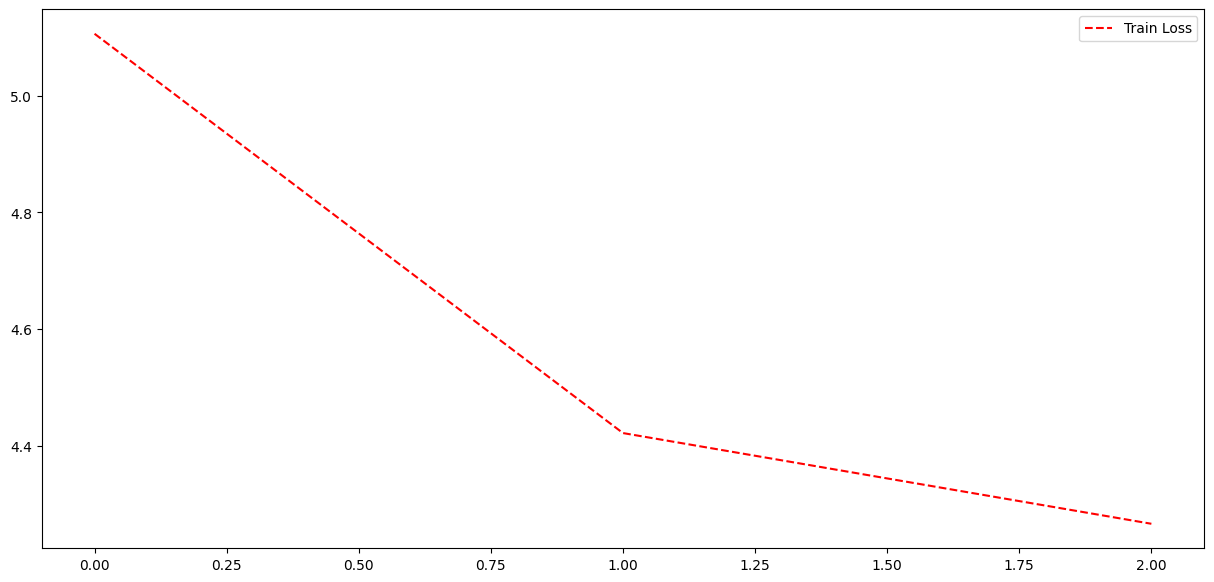

In [47]:
import matplotlib.pyplot as plt  # Import the matplotlib plotting library

plt.figure(figsize=(15, 7))       # Create a new figure with size 15x7 inches

plt.plot(range(len(total_losses)), total_losses, 'r--' ,label="Train Loss")
# Plot training losses with red dashed line and label
plt.legend()
# Display the legend to identify plotted lines

In [ ]:
checkpoint_path = "transformer_2.pth"  # Replace with your saved file
state_dict = torch.load(checkpoint_path, map_location=device)  # Load to CPU/GPU
model.load_state_dict(state_dict)

<All keys matched successfully>

### **Model Evaluation and Interactive Inference**

#### **Evaluation Function (`evaluate`)**
Generates responses using either greedy decoding (deterministic) or top-k sampling (stochastic).

**Parameters:**
- `model`: Trained transformer model
- `question`: Input sequence tensor `[1, src_len]`
- `word_map`: Vocabulary mapping (word → index)
- `max_len`: Maximum output length (default: 30)
- `top_k`: Controls decoding strategy:
  - `1`: Greedy decoding (always picks highest probability token)
  - `>1`: Top-k sampling (randomly samples from top-k tokens)
  - `None`: Full vocabulary sampling

**Process:**
1. Initializes generation with `<start>` token
2. Iteratively predicts next token:
   - Applies transformer masks for proper attention
   - Selects token based on `top_k` parameter
   - Stops when `<end>` token is generated or `max_len` reached
3. Converts token indices back to words

**Returns:**
- Generated response string

---

#### **Interactive Loop**
Provides a chat interface for real-time model interaction:

**Features:**
- Handles OOV words with `<unk>` tokens
- Dynamic input length handling
- Exit with "quit" command

**Usage Example:**

Question: What is AI?

Bot: AI is the simulation of human intelligence processes...

In [48]:
def evaluate(model, question, word_map, max_len=30, top_k=1):
    """
    Performs decoding using either Greedy (top_k=1) or Top-k sampling (top_k > 1 or None).
    Args:
        model: Trained Transformer model.
        question: Input sequence tensor of shape [1, src_len].
        word_map: Dictionary mapping words to indices.
        max_len: Maximum length of generated sequence.
        top_k: If 1, uses greedy decoding. If >1 or None, uses Top-k sampling.
    Returns:
        sentence: Generated output sequence as a string.
    """
    model.eval()  # Set model to evaluation mode

    # Get special tokens
    start_token = word_map['<start>']
    end_token = word_map['<end>']

    question = question.to(device)  # Move input to device (shape: [1, src_len])
    generated = torch.LongTensor([[start_token]]).to(device)  # Initialize with <start> token (shape: [1, 1])

    # Autoregressive decoding loop
    for _ in range(max_len - 1):
        # Create masks for current generated sequence
        src_key_padding_mask, tgt_key_padding_mask, tgt_mask = create_transformer_masks(question, generated)

        # Forward pass (no teacher forcing)
        output = model(
            question,
            generated,
            src_key_padding_mask=src_key_padding_mask,
            tgt_key_padding_mask=tgt_key_padding_mask,
            tgt_mask=tgt_mask
        )
        predictions = output[:, -1, :]  # Get last predicted token (shape: [1, vocab_size])
        probs = torch.softmax(predictions, dim=-1).squeeze(0)  # Convert to probabilities (shape: [vocab_size])

        # Select next token (greedy or sampling)
        if top_k != 1:
            if top_k is None:  # Sample from full vocabulary
                top_ch = np.arange(len(word_map))
                p = probs.detach().cpu().numpy()
            else:  # Top-k sampling
                p, top_ch = torch.topk(probs, k=top_k)
                p = p.detach().cpu().numpy()
                top_ch = top_ch.detach().cpu().numpy()
            next_word = np.random.choice(top_ch, p=p/p.sum())  # Sample from Top-k
        else:  # Greedy decoding
            next_word = torch.argmax(probs).item()

        # Stop if <end> token is generated
        if next_word == end_token:
            break

        # Append new token to generated sequence
        next_word_tensor = torch.LongTensor([[next_word]]).to(device)
        generated = torch.cat([generated, next_word_tensor], dim=1)  # shape: [1, current_len + 1]

    # Convert token indices to words
    rev_word_map = {v: k for k, v in word_map.items()}  # Inverse word map
    generated = generated.squeeze(0).tolist()  # Remove batch dim and convert to list
    sen_idx = [idx for idx in generated if idx != start_token]  # Remove <start> token
    sentence = " ".join([rev_word_map[idx] for idx in sen_idx])  # Join tokens into string

    return sentence

In [52]:
import numpy as np

# Interactive loop
while True:
    question = input("Question: ")
    if question.lower() == "quit":
        break

    max_len = 20

    enc_qus = [word_map.get(word, word_map["<unk>"]) for word in question.strip().split()]
    if not enc_qus:
        print("Empty input.")
        continue

    question_tensor = torch.LongTensor(enc_qus).unsqueeze(0).to(device)  # [1, src_len]

    sentence = evaluate(model, question_tensor, word_map, max_len=max_len, top_k=3)
    print("Bot:", sentence)

Question: hello
Bot: i was a very good one
Question: how are you doing
Bot: i dont want to know what i mean
Question: what is your name
Bot: what are you going to have
Question: quit
